In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df=df.drop(['date','street','city','statezip','country','view','waterfront'],axis=1)

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992


In [6]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [7]:
x=df.drop(['price'],axis=1)
y=df['price']

In [8]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,4,1510,0,1954,1979
4596,3.0,2.50,1460,7573,2.0,3,1460,0,1983,2009
4597,3.0,2.50,3010,7014,2.0,3,3010,0,2009,0
4598,4.0,2.00,2090,6630,1.0,3,1070,1020,1974,0


In [9]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [10]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
dtype: object

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,
                                              random_state=1)

In [12]:
print(x_train.shape)
print(x_test.shape)

(3450, 10)
(1150, 10)


# Linear Regression

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)


-253489947735.31854


# Ridge Regression
 

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(x, y)

print('Best value of alpha:', ridge_regressor.best_params_)
print('Best score:', ridge_regressor.best_score_)

Best value of alpha: {'alpha': 100}
Best score: -253369097843.51465


# Lasso Regression

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(x, y)

print("Best parameters:", ridge_regressor.best_params_)
print("Best score:", ridge_regressor.best_score_)


Best parameters: {'alpha': 100}
Best score: -253476135779.70117


In [19]:
prediction_lasso=lasso_regressor.predict(x_test)
prediction_ridge=ridge_regressor.predict(x_test)

/tmp/ipykernel_16640/2700037517.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<AxesSubplot: xlabel='price', ylabel='Density'>

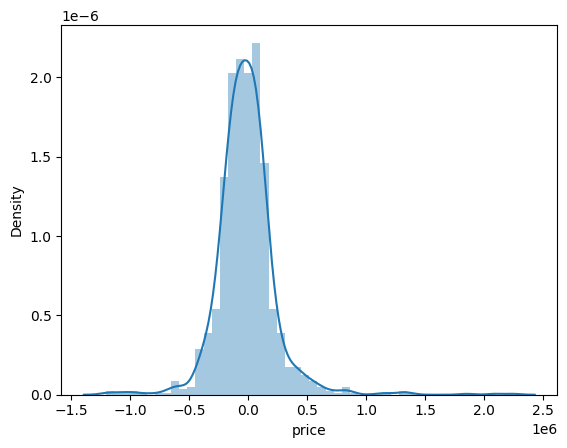

In [24]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)
